In [73]:
import pandas as pd
import numpy as np
import statsmodels as sm
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

In [8]:
pd.read_csv("ADBEVGT trading view export.csv").head()

,time,open,high,low,close,MA,MA.1,MA.2,Volume,Volume MA,VWAP,Plot
0,1570644300,1.281682,1.282617,1.281682,1.282617,1.282384,1.282821,1.283490,1100,932.5,1.285161,-7.753598
1,1570644600,1.282850,1.282944,1.282850,1.282944,1.282430,1.282789,1.283468,800,927.5,1.285141,-6.151262
2,1570644900,1.282523,1.282991,1.282523,1.282991,1.282479,1.282771,1.283447,1200,972.5,1.285112,2.172024
3,1570645200,1.283879,1.283879,1.283879,1.283879,1.282610,1.282797,1.283444,400,977.5,1.285106,-7.817017
4,1570645500,1.283785,1.283832,1.283411,1.283411,1.282692,1.282819,1.283432,1400,910.0,1.285083,5.012303


In [51]:
closing_price = pd.read_csv("ADBEVGT trading view export.csv")['close']
vwap = pd.read_csv("ADBEVGT trading view export.csv")["VWAP"]
Volume = pd.read_csv("ADBEVGT trading view export.csv")["Volume"]

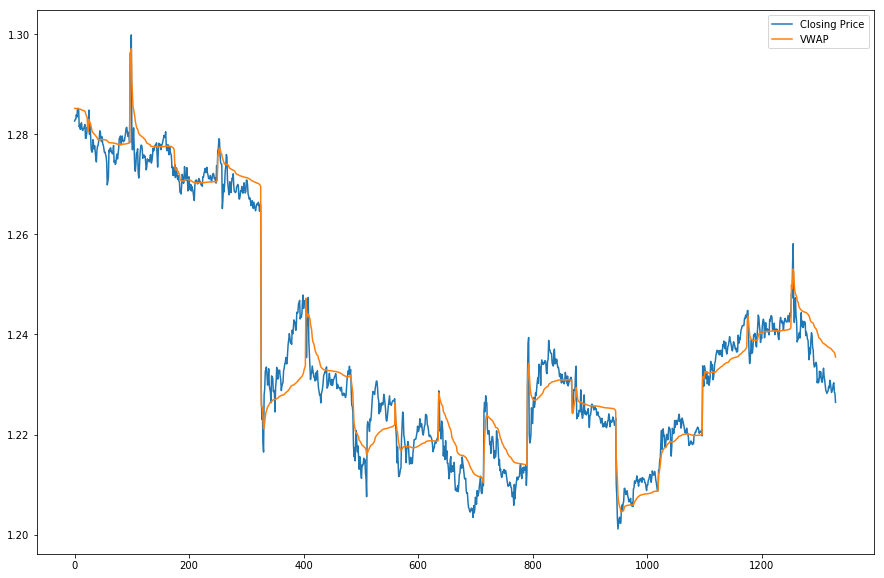

In [97]:
closing_price.plot(figsize= (15,10), label= "Closing Price")
vwap.plot(label = "VWAP")
plt.legend();

In [30]:
adbe = pd.read_csv("adobe 5min data.csv")["close"]
vgt = pd.read_csv("VGT 5 mins.csv")["close"]
ticker_1 = adbe
ticker_2 = vgt

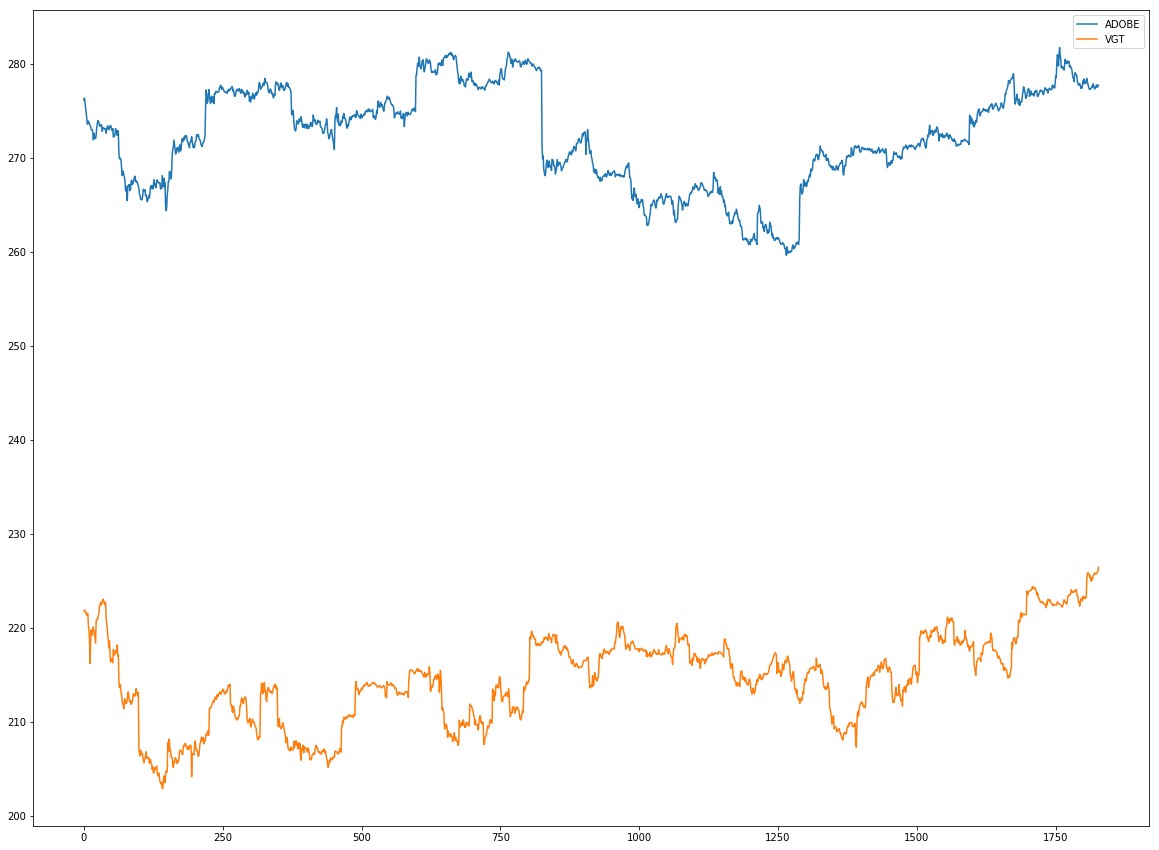

In [99]:
adbe.plot(figsize=(20,15), label="ADOBE")
vgt.plot(label="VGT")
plt.legend();

In [32]:
from statsmodels.tsa.stattools import coint

In [33]:
t_stat_summary = coint(adbe, vgt, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [38]:
print('\n--------Engel-Granger Co-Integration Test-----------\n')
print('T-stat for the pair ADBE VS CGT :', t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('\n--------------------------------------\n')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))


--------Engel-Granger Co-Integration Test-----------

T-stat for the pair ADBE VS CGT : -1.852649605993599
Alpha value for the T-stat:  0.6038141480565411

--------------------------------------

T-stat 99%:  -3.902444516063703
T-stat 95%:  -3.3394763790571935
T-stat 90%:  -3.0467722160806896


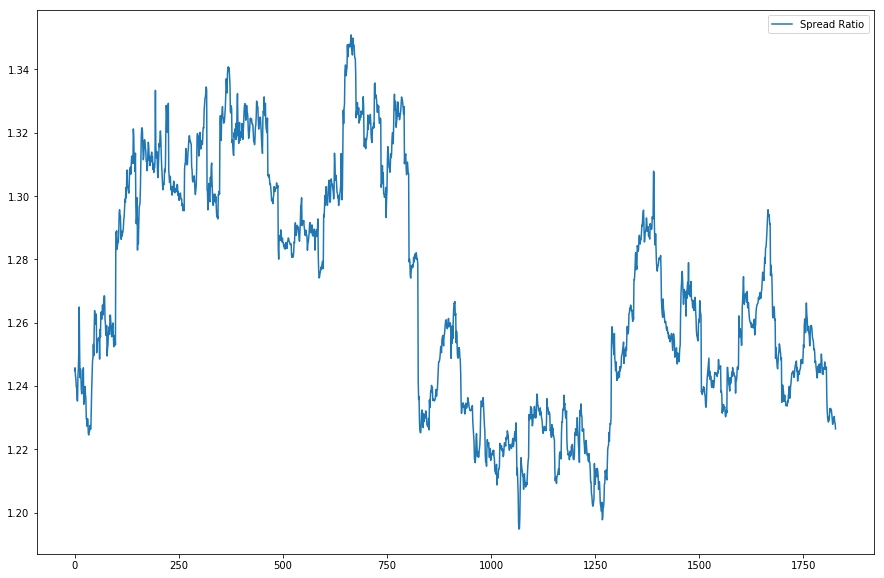

In [101]:
spread_ratio = adbe/vgt
spread_ratio.plot(figsize= (15,10), label =("Spread Ratio"))
plt.legend();

In [47]:
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('\n-----------Augmented Dickey-Fuller Test: ----------\n')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("\nstrong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary\n")
    else:
        print("\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary\n ")
    
    print("Dickey Fuller Confidence Intervals:  ", adfuller(spread_ratio)[4])

adf_check(spread_ratio)


-----------Augmented Dickey-Fuller Test: ----------

ADF Test Statistic : -2.1427367138090005
p-value : 0.2276806316108288
#Lags Used : 0
Number of Observations Used : 1827

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary
 
Dickey Fuller Confidence Intervals:   {'1%': -3.433934297502219, '5%': -2.8631232673540117, '10%': -2.5676128776645637}


In [49]:
np.corrcoef(adbe,vgt)

array([[1.        , 0.00300826],
       [0.00300826, 1.        ]])

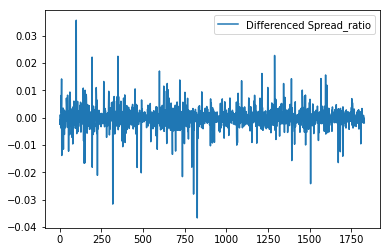

In [102]:
spread_diff = spread_ratio.diff()
spread_diff.plot(label = "Differenced Spread_ratio")
plt.legend();

In [72]:
spread_diff_dropna = spread_diff.dropna()
adf_check(spread_diff_dropna)


-----------Augmented Dickey-Fuller Test: ----------

ADF Test Statistic : -43.32390389327915
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1826

strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

Dickey Fuller Confidence Intervals:   {'1%': -3.433934297502219, '5%': -2.8631232673540117, '10%': -2.5676128776645637}


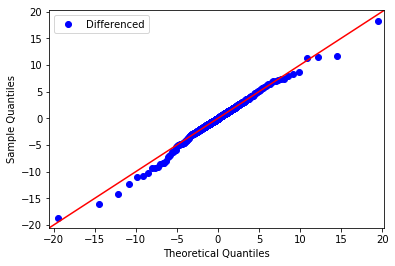

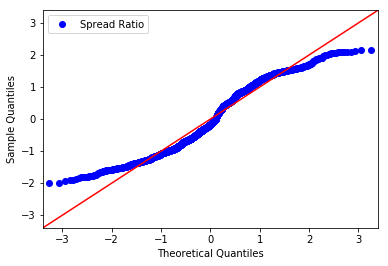

In [93]:
import statsmodels.api as smapi
fig = smapi.qqplot(spread_diff_dropna, stats.t, fit=True, line='45', label="Differenced")
plt.legend()
fig2 = smapi.qqplot(spread_ratio, stats.t, fit = True, line = "45", label = "Spread Ratio")
plt.legend()